In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#Importing all the necessary libraries for image processing
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
fold_df = pd.read_csv("../../Folds.csv")

In [7]:
img_path = "../../../BreaKHis_v1/"
classes = ["benign","malign"]

In [8]:
#Renaming the column filename to path
fold_df = fold_df.rename(columns = {"filename":"path"})
#Printing the head of the file
fold_df.head(3)

fold  mag    grp                                               path
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...

In [9]:
fold_df['path'][1]

'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

In [10]:
#Extracting the filename and label from the path column
fold_df['filename'] = fold_df['path'].apply(lambda x:x.split("/")[-1])
fold_df["label"] = fold_df['path'].apply(lambda x: x.split("/")[3])

In [11]:
fold_df.head(3)

fold  mag    grp                                               path  \
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                         filename   label  
0  SOB_B_A-14-22549AB-100-001.png  benign  
1  SOB_B_A-14-22549AB-100-002.png  benign  
2  SOB_B_A-14-22549AB-100-003.png  benign

In [40]:
os.makedirs("../../Cancer/")

In [41]:
#Moving all the images to one folder
for p in fold_df['path']:
    src = "../../../" + p
    dest = "../../Cancer/"
    #saving the files with its corresponding class and patient_id
    dest = os.path.join(dest,src.split("/")[6]+ "_" + src.split("/")[-1])
    shutil.copyfile(src,dest)   

KeyboardInterrupt: 

In [42]:
len(os.listdir("../../Cancer/"))

7909

In [43]:
fold_df['file_loc'] = fold_df['label'] + "_" + fold_df['filename']

fold_df['class'] = fold_df['label'].apply(lambda x: 0 if x =='benign' else 1)

In [44]:
fold_df.head(3)

fold  mag    grp                                               path  \
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                         filename   label  \
0  SOB_B_A-14-22549AB-100-001.png  benign   
1  SOB_B_A-14-22549AB-100-002.png  benign   
2  SOB_B_A-14-22549AB-100-003.png  benign   

                                file_loc  class  
0  benign_SOB_B_A-14-22549AB-100-001.png      0  
1  benign_SOB_B_A-14-22549AB-100-002.png      0  
2  benign_SOB_B_A-14-22549AB-100-003.png      0

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


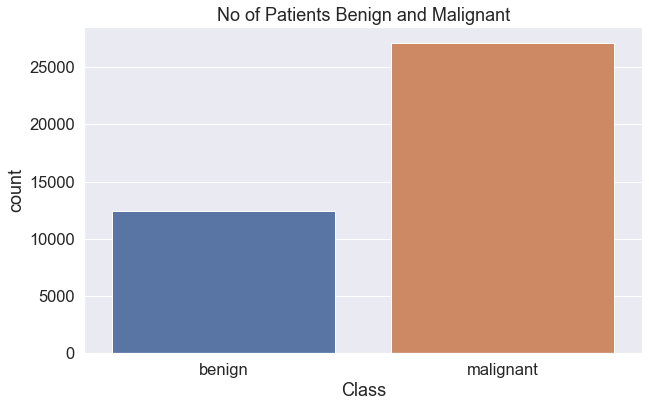

In [45]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
sns.countplot(fold_df['label']);
plt.xlabel("Class")
plt.title("No of Patients Benign and Malignant");

In [46]:
#Filtering the data frame to benign and malignant for visualization
benign_df = fold_df[fold_df['label'] == 'benign']
malignant_df = fold_df[fold_df['label'] == 'malignant']

In [47]:
benign_df

fold  mag    grp                                               path  \
0         1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1         1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2         1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
3         1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
4         1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
...     ...  ...    ...                                                ...   
37527     5  400   test  BreaKHis_v1/histology_slides/breast/benign/SOB...   
37528     5  400   test  BreaKHis_v1/histology_slides/breast/benign/SOB...   
37529     5  400   test  BreaKHis_v1/histology_slides/breast/benign/SOB...   
37530     5  400   test  BreaKHis_v1/histology_slides/breast/benign/SOB...   
37531     5  400   test  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                             filename   label  \
0      SOB_B_A-14-22549AB-100-001.png  benign   
1      SOB_B_A-14-22549AB-100-002.png  benign   
2      SOB_B_A-14-22549AB-100-003.png  benign   
3      SOB_B_A-14-22549AB-100-004.png  benign   
4      SOB_B_A-14-22549AB-100-005.png  benign   
...                               ...     ...   
37527   SOB_B_TA-14-3411F-400-013.png  benign   
37528   SOB_B_TA-14-3411F-400-014.png  benign   
37529   SOB_B_TA-14-3411F-400-015.png  benign   
37530   SOB_B_TA-14-3411F-400-016.png  benign   
37531   SOB_B_TA-14-3411F-400-017.png  benign   

                                    file_loc  class  
0      benign_SOB_B_A-14-22549AB-100-001.png      0  
1      benign_SOB_B_A-14-22549AB-100-002.png      0  
2      benign_SOB_B_A-14-22549AB-100-003.png      0  
3      benign_SOB_B_A-14-22549AB-100-004.png      0  
4      benign_SOB_B_A-14-22549AB-100-005.png      0  
...                                      ...    ...  
37527   benign_SOB_B_TA-14-3411F-400-013.png      0  
37528   benign_SOB_B_TA-14-3411F-400-014.png      0  
37529   benign_SOB_B_TA-14-3411F-400-015.png      0  
37530   benign_SOB_B_TA-14-3411F-400-016.png      0  
37531   benign_SOB_B_TA-14-3411F-400-017.png      0  

[12400 rows x 8 columns]

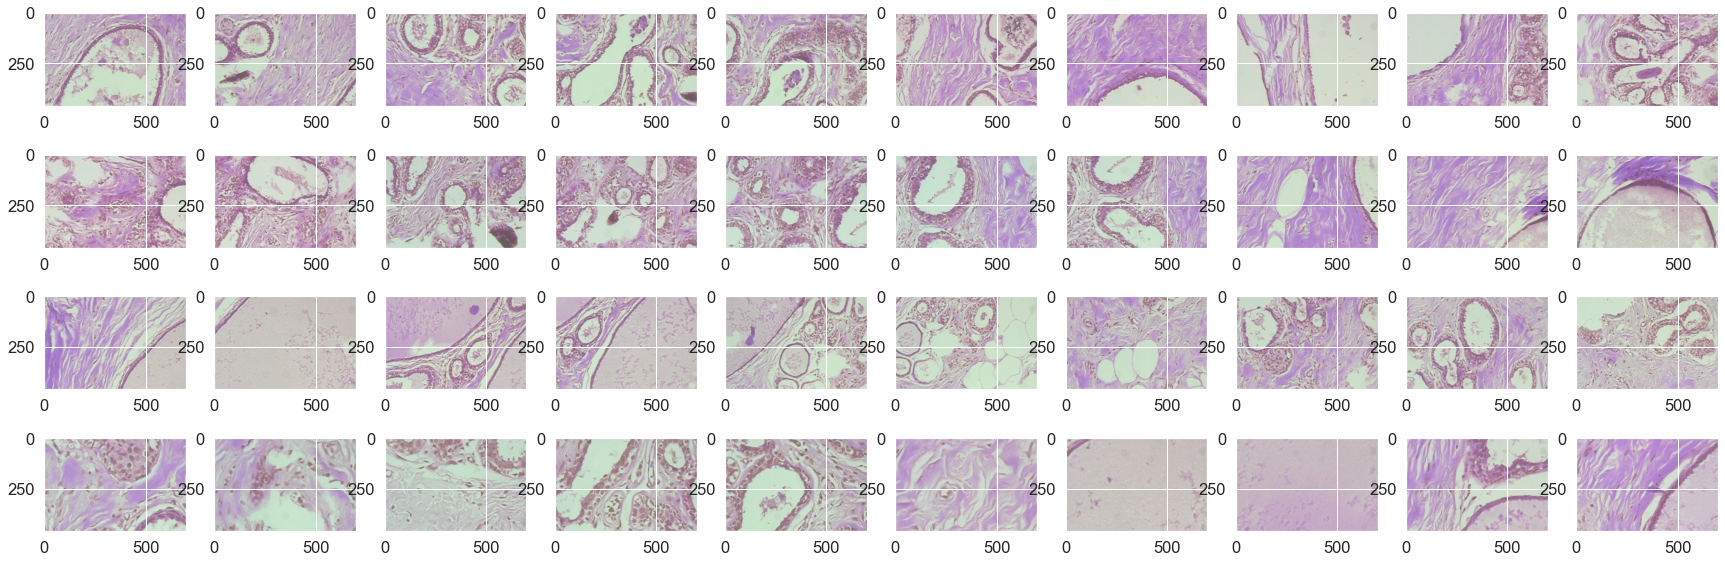

In [52]:
plt.figure(figsize = (30,10))
for i in range(0,40):
    plt.subplot(4,10,i+1)
    img = cv2.imread("../../Cancer/"+ benign_df['file_loc'][i],1)
    plt.imshow(img)

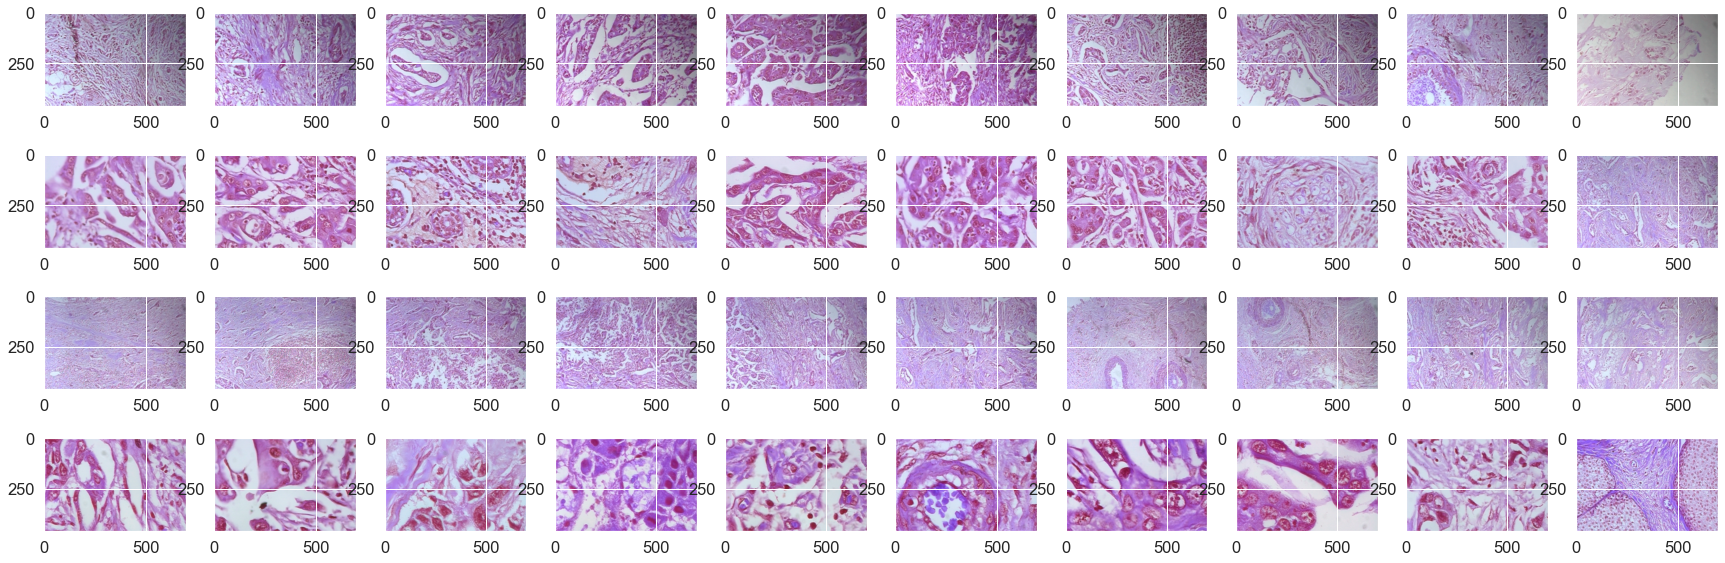

In [53]:
images = malignant_df['file_loc'].values
plt.figure(figsize = (30,10))
for i in range(0,40):
    plt.subplot(4,10,i+1)
    img = cv2.imread("../../Cancer/"+ images[i],1)
    plt.imshow(img)

In [54]:
df = pd.DataFrame(os.listdir("../../Cancer/"))
df = df.rename(columns = {0:'file_loc'})
df['label'] = df['file_loc'].apply(lambda x:x.split("_")[0])
df['class'] = df['label'].apply(lambda x: 0 if x =='benign' else 1)
df.set_index("file_loc",inplace=True)

In [56]:
df.head(2)

label  class
file_loc                                            
benign_SOB_B_A-14-22549AB-100-001.png  benign      0
benign_SOB_B_A-14-22549AB-100-002.png  benign      0

In [57]:
#Performing the splitting
data_train_and_val, data_test = train_test_split(df, test_size = 0.1, random_state = 47)
#Traing and val
data_train, data_val = train_test_split(data_train_and_val, test_size = 0.1, random_state = 47)

In [58]:
print("Training size :", data_train.shape)
print("Validation size :", data_val.shape)
print("Testing size :", data_test.shape)

Training size : (6406, 2)
Validation size : (712, 2)
Testing size : (791, 2)


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


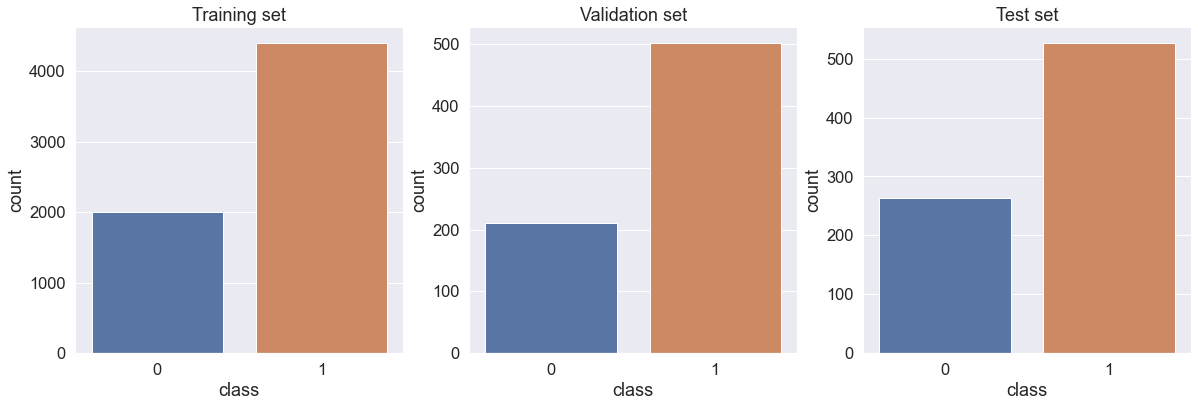

In [59]:
#Plotting
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(data_train['class'])
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(data_test['class']);
plt.title("Test set");

In [60]:
train_has_cancer = data_train[data_train['class'] == 1]
train_has_no_cancer = data_train[data_train['class'] == 0]

In [62]:
train_has_cancer.shape

(4400, 2)

In [64]:
train_has_no_cancer.shape

(2006, 2)

In [65]:
train_has_no_cancer_upsample = resample(train_has_no_cancer, n_samples = len(train_has_cancer), random_state = 47, replace = True)

In [74]:
data_train = pd.concat([train_has_cancer, train_has_no_cancer_upsample])
data_train.index

Index(['malignant_SOB_M_DC-14-3909-100-019.png',
       'malignant_SOB_M_DC-14-6241-100-020.png',
       'malignant_SOB_M_DC-14-20629-100-014.png',
       'malignant_SOB_M_MC-14-13413-100-025.png',
       'malignant_SOB_M_DC-14-17614-100-009.png',
       'malignant_SOB_M_DC-14-4372-200-001.png',
       'malignant_SOB_M_DC-14-15696-400-001.png',
       'malignant_SOB_M_MC-14-19979-200-004.png',
       'malignant_SOB_M_DC-14-2980-200-014.png',
       'malignant_SOB_M_LC-14-12204-200-047.png',
       ...
       'benign_SOB_B_A-14-22549AB-200-024.png',
       'benign_SOB_B_PT-14-21998AB-400-033.png',
       'benign_SOB_B_PT-14-21998AB-200-014.png',
       'benign_SOB_B_TA-14-16184-200-028.png',
       'benign_SOB_B_F-14-21998EF-200-010.png',
       'benign_SOB_B_F-14-21998EF-200-007.png',
       'benign_SOB_B_PT-14-21998AB-100-042.png',
       'benign_SOB_B_PT-14-22704-200-018.png',
       'benign_SOB_B_PT-14-21998AB-40-057.png',
       'benign_SOB_B_F-14-14134E-100-017.png'],
      dtype=

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


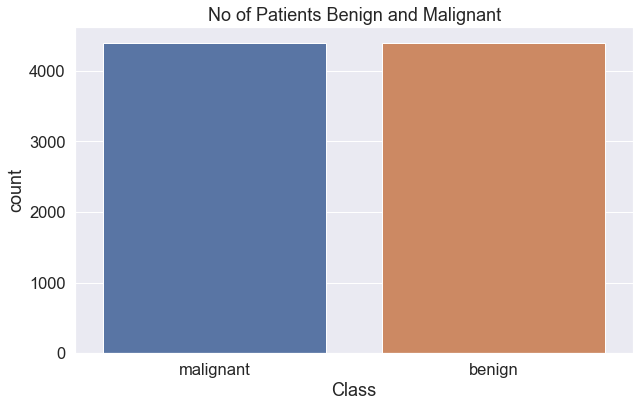

In [68]:
#Lets explore the data set
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
sns.countplot(data_train['label']);
plt.xlabel("Class")
plt.title("No of Patients Benign and Malignant");

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


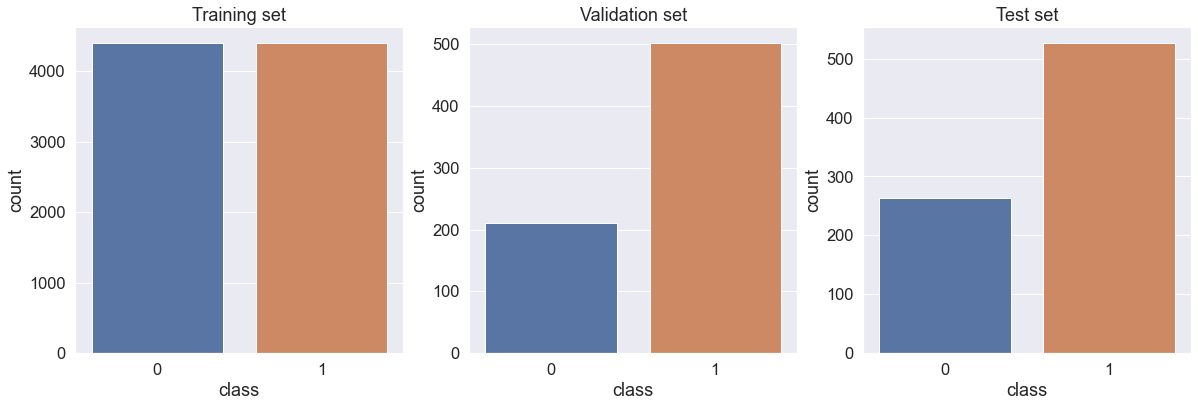

In [69]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(data_train['class'])
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(data_test['class']);
plt.title("Test set");

In [70]:
os.makedirs("../../Cancer_train")
os.makedirs("../../Cancer_test")
os.makedirs("../../Cancer_validation")
os.makedirs("../../Cancer_train/benign")
os.makedirs("../../Cancer_train/malignant")
os.makedirs("../../Cancer_validation/benign")
os.makedirs("../../Cancer_validation/malignant")
os.makedirs("../../Cancer_test/benign")
os.makedirs("../../Cancer_test/malignant")

In [76]:
i = 1
for img in data_train.index:
    if img!=".DS_Store":
        if i>3642:
            target = df.loc[img,'class']
            if target == 1:
                label = 'malignant'
            else:          
                label = 'benign'      
            src = os.path.join("../../Cancer/",img)
            dest = os.path.join("../../Cancer_train/",label, "image" + str(i)+".png")
            img1 = np.array(cv2.imread(src))
            cv2.imwrite(dest,img1)
        i = i+1

In [77]:
for img in data_val.index:
    target = data_val.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../../Cancer/",img)
    dest = os.path.join("../../Cancer_validation/",label,img)
    shutil.copyfile(src,dest)

In [79]:
for img in data_test.index:
    target = data_test.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../../Cancer/",img)
    dest = os.path.join("../../Cancer_test/",label,img)
    shutil.copyfile(src,dest)

In [81]:
#Checking their lengths
print("Training Data:")
print(" ")
print("Benign:",len(os.listdir("../../Cancer_train/benign/")))
print("Malignant::",len(os.listdir("../../Cancer_train/malignant/")))
print(" ")
print("Validation Data")
print(" ")
print("Benign size:",len(os.listdir("../../Cancer_validation/benign/")))
print("Malignant size :",len(os.listdir("../../Cancer_validation/malignant/")))
print(" ")
print("Testing Data:")
print(" ")
print("Benign size :",len(os.listdir("../../Cancer_test/benign/")))
print("Malignant size :",len(os.listdir("../../Cancer_test/malignant/")))

Training Data:
 
Benign: 4400
Malignant:: 4400
 
Validation Data
 
Benign size: 210
Malignant size : 502
 
Testing Data:
 
Benign size : 264
Malignant size : 527


In [82]:
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2)

In [83]:
train_generation = datagen.flow_from_directory("../../Cancer_train/",target_size=(128,128),batch_size = 32, class_mode="binary")

Found 8800 images belonging to 2 classes.


In [85]:
val_generation = datagen.flow_from_directory("../../Cancer_validation/", target_size=(128,128), batch_size=32, class_mode="binary")

Found 712 images belonging to 2 classes.


In [89]:
cancer_model = Sequential()

cancer_model.add(Conv2D(filters = 32, kernel_size = (3,3,), input_shape = (128, 128, 3), activation="relu"))
cancer_model.add(MaxPooling2D(pool_size=(2,2)))

cancer_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation="relu"))
cancer_model.add(MaxPooling2D(pool_size=(2,2)))

cancer_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
cancer_model.add(MaxPooling2D(pool_size=(2,2)))
cancer_model.add(Dropout(0.4))

cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
cancer_model.add(MaxPooling2D(pool_size=(2,2)))
cancer_model.add(Dropout(0.2))

cancer_model.add(Flatten())

cancer_model.add(Dense(256, activation = "relu"))
cancer_model.add(Dense(128, activation = 'relu'))
cancer_model.add(Dense(1, activation = 'sigmoid'))

cancer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)     

In [91]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=20*50,
    decay_rate=1,
    staircase=False,
)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)


In [92]:
cancer_model.compile(loss='binary_crossentropy', optimizer = get_optimizer(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)

In [93]:
history = cancer_model.fit(train_generation, validation_data=val_generation, epochs=200 ,
                 callbacks=[early_stop,checkpoint], verbose = 1)

Epoch 1/200
275/275 [==============================] - 495s 2s/step - loss: 0.5613 - accuracy: 0.7134 - val_loss: 0.6712 - val_accuracy: 0.7626
Epoch 2/200
275/275 [==============================] - 416s 2s/step - loss: 0.4861 - accuracy: 0.7874 - val_loss: 0.4437 - val_accuracy: 0.8497
Epoch 3/200
275/275 [==============================] - 413s 1s/step - loss: 0.4557 - accuracy: 0.8095 - val_loss: 0.4314 - val_accuracy: 0.8525
Epoch 4/200
275/275 [==============================] - 406s 1s/step - loss: 0.4501 - accuracy: 0.8107 - val_loss: 0.4272 - val_accuracy: 0.8511
Epoch 5/200
275/275 [==============================] - 410s 1s/step - loss: 0.4314 - accuracy: 0.8170 - val_loss: 0.4879 - val_accuracy: 0.8146
Epoch 6/200
275/275 [==============================] - 420s 2s/step - loss: 0.4014 - accuracy: 0.8284 - val_loss: 0.4052 - val_accuracy: 0.8329
Epoch 7/200
275/275 [==============================] - 416s 2s/step - loss: 0.3823 - accuracy: 0.8331 - val_loss: 0.4302 - val_accuracy:

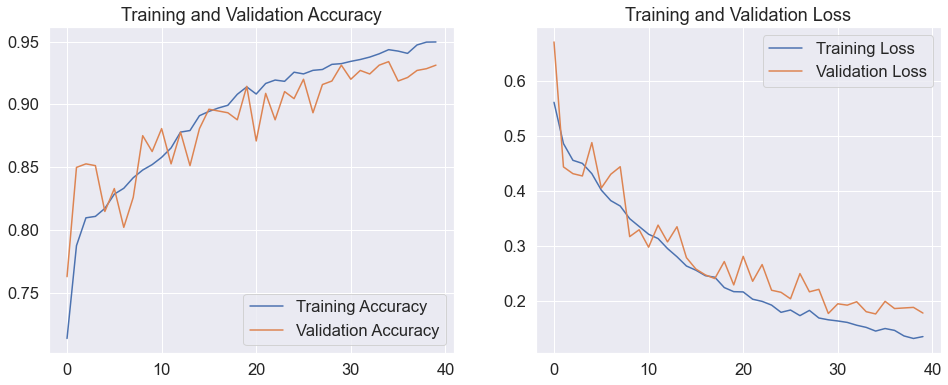

In [94]:
#Plotting the model results

#Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
test_gen = datagen.flow_from_directory("../../Cancer_test/", target_size=(128,128), class_mode="binary", batch_size=1, shuffle=False)

Found 791 images belonging to 2 classes.


In [97]:
pred = cancer_model.evaluate(test_gen)

791/791 [==============================] - 27s 34ms/step - loss: 0.2129 - accuracy: 0.9140


In [104]:
#Let's Go ahead and test our model for few Images.

#Array to hold Input Images and their labels
test = []
labels = []

#Loading random 10 images
random_images = np.random.choice(data_test.index,10)

#For loop to read and store images
for i in random_images:
    #Finding their class to load from folder
    label = data_test.loc[i,"class"]
    labels.append(label)
    if label == 1:
        lab = "malignant"
    else:
        lab = "benign"
    #Creating path
    path = os.path.join("../../Cancer_test/", lab, i)
    #reading image
    img = cv2.imread(path)
    #resizing to target shape
    img = cv2.resize(img,(128,128))
    #Making it an numpy array
    img = np.array(img)
    #Appending it to the list
    test.append(img)

#Making the list as numpy array
test = np.asarray(test)
#rescaling it by pixel value
test = test/255.

In [105]:
#Performing the prediction
pred = (cancer_model.predict(test) > 0.5).astype("int32")
#Flattening the list to form single dimensional list
pred = pred.flatten()

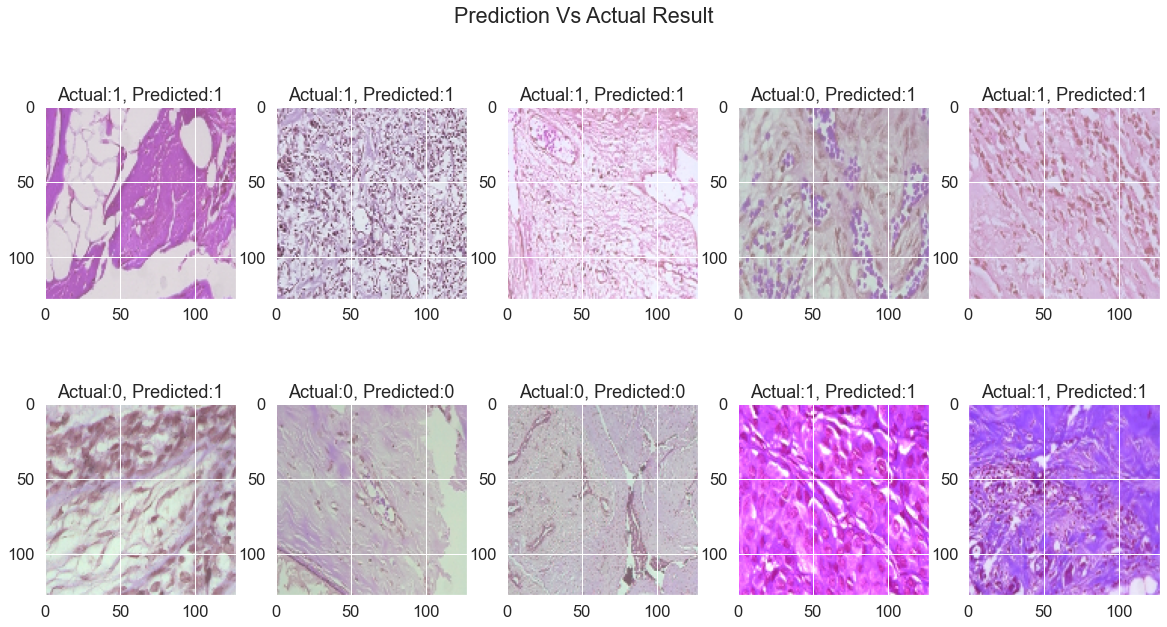

In [106]:
#Plotting results and actual prediction
plt.figure(figsize=(20,10))
plt.suptitle("Prediction Vs Actual Result")
for i in range(0,10):
    string = "Actual:" + str(labels[i]) + ", Predicted:" + str(pred[i])
    plt.subplot(2,5,i+1)
    plt.imshow(test[i])
    plt.title(string)